# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [235]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns
from scipy import stats
import numpy as np

![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [236]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [237]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [273]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [239]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [240]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [241]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

### Data types

In [242]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

### None Values 

In [243]:
train_dataset.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### Data description 

In [244]:
train_dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


### Feature extraction: correlation  

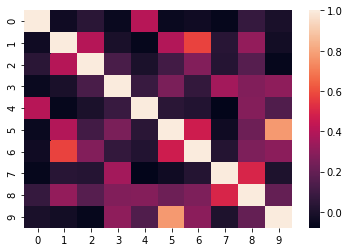

In [245]:
%matplotlib inline
sns.heatmap(train_dataset.corr())

We can see that feature 5 and feature 9 are strongly correlated, and looking at the original article, we found that feature 9 is the coefficient of feature 5 and feature 6, so we can drop it with out losing information

In [246]:
train_dataset.drop(columns=["9"],inplace=True)

### Deleting outliers 

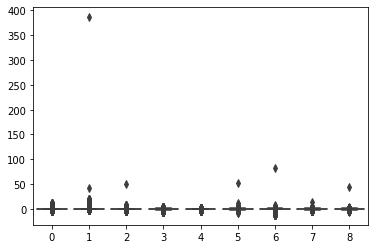

In [247]:
sns.boxplot(data=train_dataset)

In [248]:
train_dataset=train_dataset[(np.abs(stats.zscore(train_dataset[train_dataset.columns[0:9]])) < 3).all(axis=1)]

Finally we will split our dataset

In [249]:
from sklearn.model_selection import train_test_split
X=train_dataset[train_dataset.columns[0:9]]
y=train_dataset[train_dataset.columns[9]]

X_train, X_test, y_train, y_test = train_test_split(X,y)


## Processing test dataset 

In [274]:
test_dataset.drop(columns=["9"],inplace=True)


## Making models

### Decision Tree Classifier 

In [275]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test,y_test) #0.95703

clf=clf.fit(X,y)

prediction=clf.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

First attemp: 'accuracy': 0.9408387418871692

In [288]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

clf.score(X_test,y_test) #0.98138

clf=clf.fit(X,y)

prediction=clf.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

'accuracy': 0.9660509236145781,

### Random Forest Classifier 

In [289]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc=rfc.fit(X_train,y_train)
rfc.score(X_test,y_test) #0.99462

rfc=rfc.fit(X,y)

prediction=rfc.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

'accuracy': 0.9684223664503245

In [292]:
rfc=RandomForestClassifier(criterion="entropy")
rfc=rfc.fit(X_train,y_train)
rfc.score(X_test,y_test) #0.99641

rfc=rfc.fit(X,y)

prediction=rfc.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

'accuracy': 0.9729156265601597

### KNeighborsClassifier 

In [295]:
from sklearn.neighbors import KNeighborsClassifier

knc=RandomForestClassifier()
knc=rfc.fit(X_train,y_train)
knc.score(X_test,y_test) #0.99641

knc=knc.fit(X,y)

prediction=knc.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

'accuracy': 0.9692960559161258

### Supported Vector Classifier 

In [301]:
from sklearn.svm import SVC

svc=RandomForestClassifier()
svc=rfc.fit(X_train,y_train)
svc.score(X_test,y_test) #0.99606

svc=svc.fit(X,y)

prediction=svc.predict(test_dataset)
pd.DataFrame(prediction).to_csv('../data/sample_submission.csv',header=None)

'accuracy': 0.9710434348477284

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [ ]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [302]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9710434348477284,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)